In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.constants as si
from scipy.integrate import solve_ivp  as ode

**Q) Hvordan kan vi simulere et jordlag...?** 
> *Vi kan kigge på fjedre på en række!*
> ![](Springs.png)

In [10]:
N = 150
n = N + 2
dx0 = 0.1
dx = np.zeros(2*n)
dx[1]= dx0

k = np.ones(n)*0.5
k[50:] = 1
k[100:] = 1.5

k[0] = 0
k[-1] = 0

dx.shape

(304,)

In [11]:
def f(t,dx):
    x  = dx[:n]
    xp = dx[n:]
    dxdt = np.concatenate((  xp , -k*(x - np.roll(x,1) ) -k*(x-np.roll(x,-1))  - 0.0* xp  ))
    return dxdt

In [12]:
t = np.linspace(0,300,10000)
sol = ode(f,[0,300],dx,t_eval = t)

In [13]:
t = sol.t

print(t.shape)

(10000,)


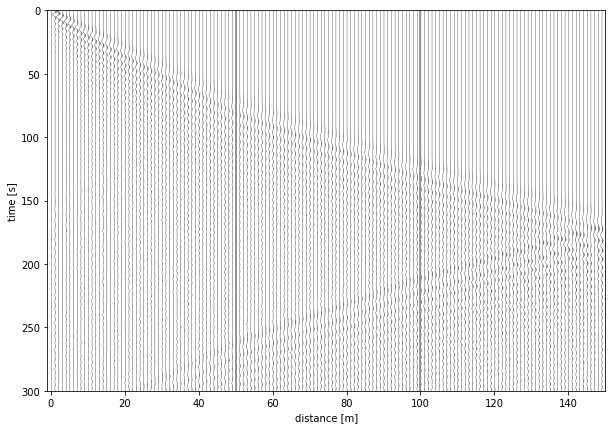

In [29]:
sol.y.shape
import seismik_funktioner
seismik_funktioner.plot_seismogram(sol.t, sol.y[:N], np.arange(N))
plt.axvline(x=50, c="gray")
plt.axvline(x=100, c="gray")

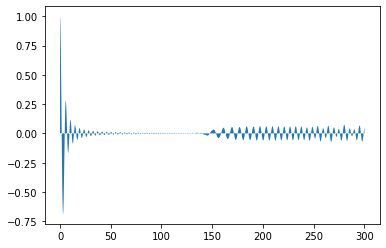

In [16]:
plt.fill_between(t,y[0]*10,0)
plt.show()